# Ejercicio 1:

Considere la Ecuación Diferencial Ordinaria (ODE) 

$$\dot{x}=-a x + b$$

donde $a,b>0$.

## 1. Encuentre el/los puntos fijos.

Sabemos que los puntos fijos $x^*$ son tales que:
$$\dot{x} = f(x) \implies x^* \text{punto fijo} \iff f(x^*) = 0$$
Entonces:
$$x^* = \frac{b}{a}$$

## 2. Determine la estabilidad lineal de el/los mismo/s.

Sabemos que $f'(x^*)$ determina la estabilidad del punto fijo. En particular, el punto fijo $x^*$ es estable si $f'(x^*) < 0$. Como $a > 0$ y $f'(x) = -a$, el punto fijo es estable.

## 3. Use el método de integración de Runge Kutta de orden 4 para calcular la trayectoria de la solución $x(0)=1$ usando $k=20$ pasos de integración en $t\in [0,5]$ para $a=2$ y $b=3$.

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def function(x, t, parameters):
    # parameters[0] = a, parameters[1] = b
    return -1*parameters[0]*x + parameters[1]

In [4]:
def runge_kuta_4(function, parameters, x_0, t_0, t_f, steps):
    x = np.zeros(steps + 1)
    x[0] = x_0
    t = np.linspace(t_0, t_f, num=steps+1, endpoint=True)
    step = t[1] - t[0]
    
    for i in range(0, steps):
        k_1 = function(x[i], t[i], parameters)
        k_2 = function(x[i] + step*k_1/2, t[i] + step/2, parameters)
        k_3 = function(x[i] + step*k_2/2, t[i] + step/2, parameters)
        k_4 = function(x[i] + step*k_3, t[i] + step, parameters)
        
        x[i+1] = x[i] + step*(k_1 + 2*k_2 + 2*k_3 + k_4)/6
    
    return x, t
        

In [5]:
x, t = runge_kuta_4(function, np.array([2, 3]), 1, 0, 5, 20)

In [6]:
x

array([1.        , 1.19661458, 1.31591458, 1.38830234, 1.43222511,
       1.45887618, 1.47504726, 1.48485941, 1.49081313, 1.49442568,
       1.49661766, 1.4979477 , 1.49875472, 1.4992444 , 1.49954152,
       1.49972181, 1.4998312 , 1.49989758, 1.49993785, 1.49996229,
       1.49997712])

In [7]:
t

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ])

## 4. Grafique la trayectoria $x(t)$. Compare con la solución exacta de condicion inicial $x(0)=x_0$:
\begin{eqnarray}
x(t) &=& \bigg(x_0-\frac{b}{a}\bigg)e^{-at}+\frac{b}{a} \\
\end{eqnarray}

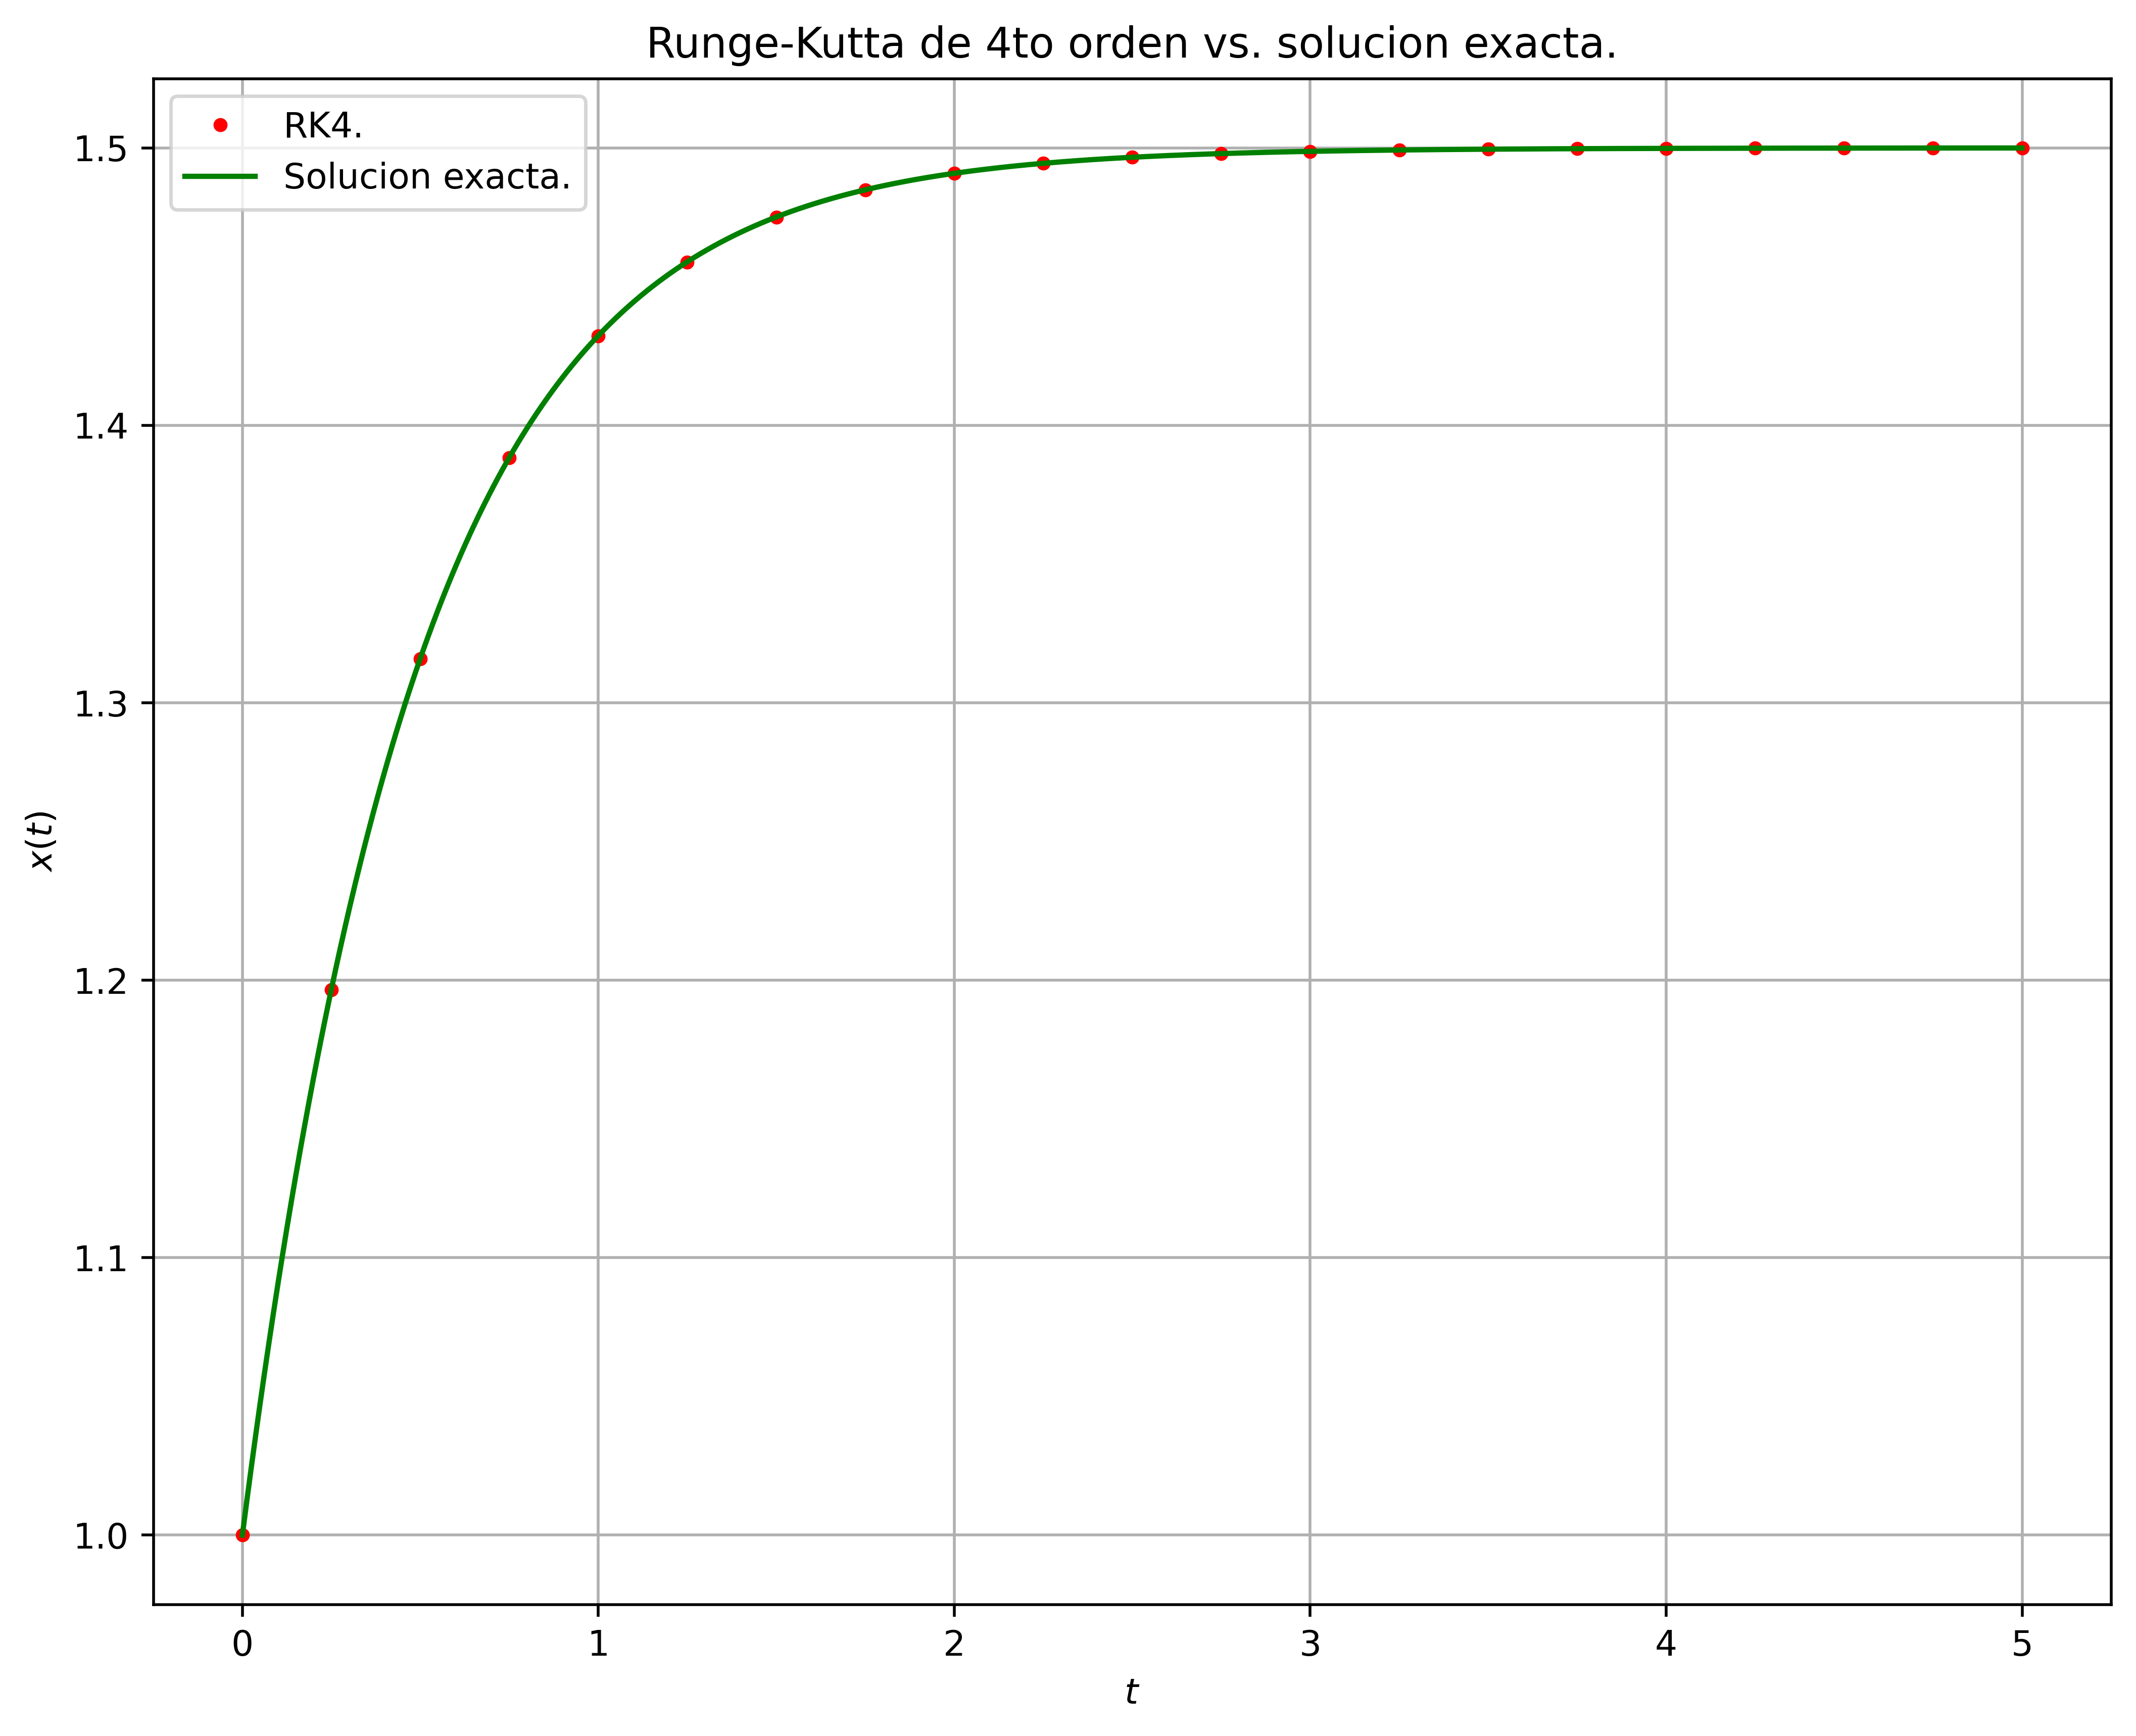

In [8]:
time = np.linspace(0, 5, 10000, endpoint=True)
exact = (1 - 3/2)*np.exp(-1*2*time) + 3/2

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 500

plt.plot(t, x, 'ro', markersize=3, label='RK4.')
plt.plot(time, exact, 'g-', label='Solucion exacta.')

plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.title('Runge-Kutta de 4to orden vs. solucion exacta.')
plt.legend(loc='best')

plt.grid(True)
plt.show()

## 5. Grafique $\dot{x}$ vs $x$. Incluya:

   ### a. Los puntos fijos, en blanco si son inestables, en negro si son estables y en rojo si son linealmente marginales.
    
   #### b. En gris a rayas, la linea $\dot{x} = 0$ para todo $x$.
    
   #### c. En azul, flechas que indiquen la dirección de cambio en cada región entre puntos fijos, incluyendo los puntos $x = \pm \infty$.

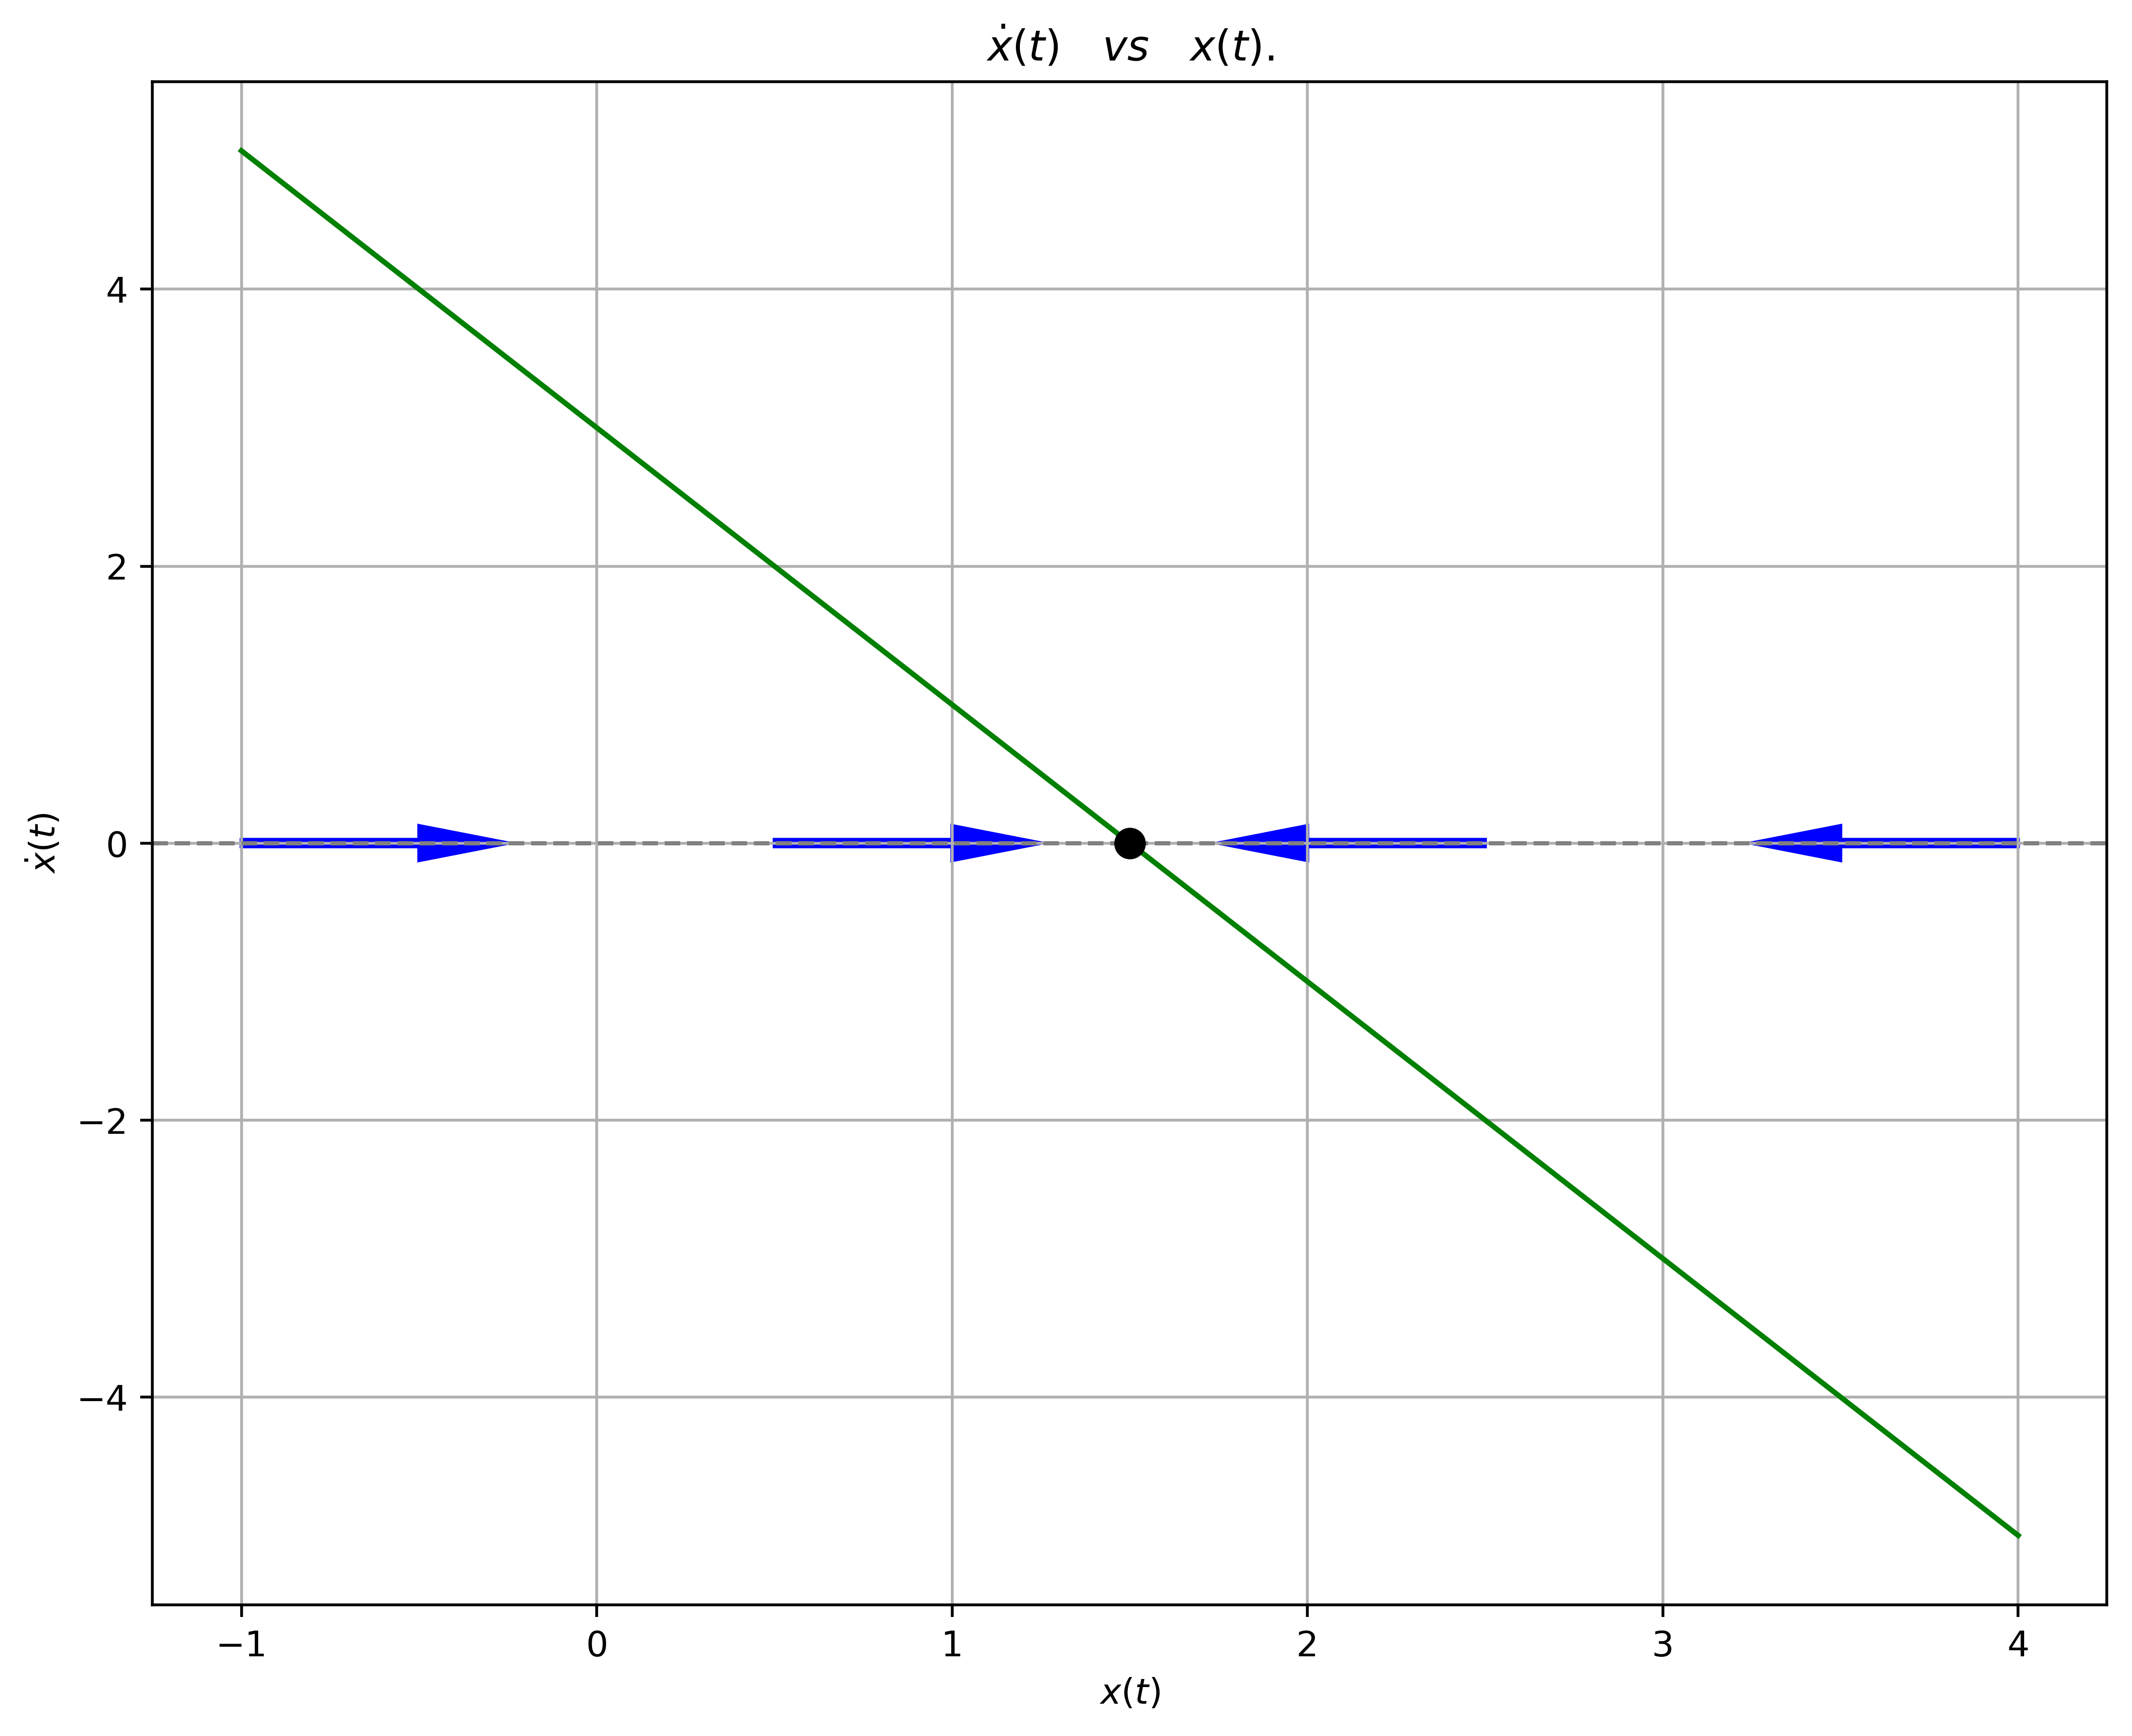

In [9]:
x_val = np.linspace(-1, 4, 10000, endpoint=True)
x_dot = -2*x_val + 3

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 500

plt.plot(x_val, x_dot, 'g-')
plt.axhline(y=0, color='grey', linestyle='--', linewidth=1.2)
plt.plot(np.array([1.5]), np.array([0]), 'ko', markersize=8)
plt.arrow(x=4, y=0, dx=-0.5, dy=0.0, width=0.05, head_width=0.25, head_length=0.25, color='b')
plt.arrow(x=2.5, y=0, dx=-0.5, dy=0.0, width=0.05, head_width=0.25, head_length=0.25, color='b')
plt.arrow(x=0.5, y=0, dx=0.5, dy=0.0, width=0.05, head_width=0.25, head_length=0.25, color='b')
plt.arrow(x=-1, y=0, dx=0.5, dy=0.0, width=0.05, head_width=0.25, head_length=0.25, color='b')

plt.xlabel(r'$x(t)$')
plt.ylabel(r'$\dot{x}(t)$')
plt.title(r'$\dot{x}(t) \quad vs \quad x(t).$')

plt.grid(True)
plt.show()

# Ejercicio 2:

La ecuación logística es

$$\dot{N} = rN\bigg(1-\frac{N}{K}\bigg)$$

donde $r>0$ representa una taza de reproducción y $K>0$ una capacidad de carga.

## 1. Determine los puntos fijos.

Tomando $$f(N) = rN\left(1-\frac{N}{K}\right)$$ es facil ver que $f(N) = 0$ para $$N = 0,K$$

## 2. Determine la estabilidad de los puntos fijos.

Tenemos $$f'(N) = r\left(1-\frac{N}{K}\right) + rN\left(-\frac{1}{K}\right) \implies f'(N) = r - \frac{2rN}{K}$$

Entonces, para $N=0$, $f'(N) = r >0$, por lo que es un punto fijo inestable, mientras que para $N=K$ se tiene $f'(N) = -r < 0$, por lo que es estable.

## 3. Utilice el integrador de Runge Kutta de orden 4 para calcular y graficar usando $k=100$ pasos de integración en $t\in [0,5]$ para $r=1$, $K=1$ y: 

   ### a. $N(0)=0.1K$
    
   ### b. $N(0)=0.7K$ 
    
   ### c. $N(0)=1.2K$

In [10]:
def function2(N, t, parameters):
    # parameters[0] = r, parameters[1] = K
    return parameters[0]*N*(1 - N/parameters[1])

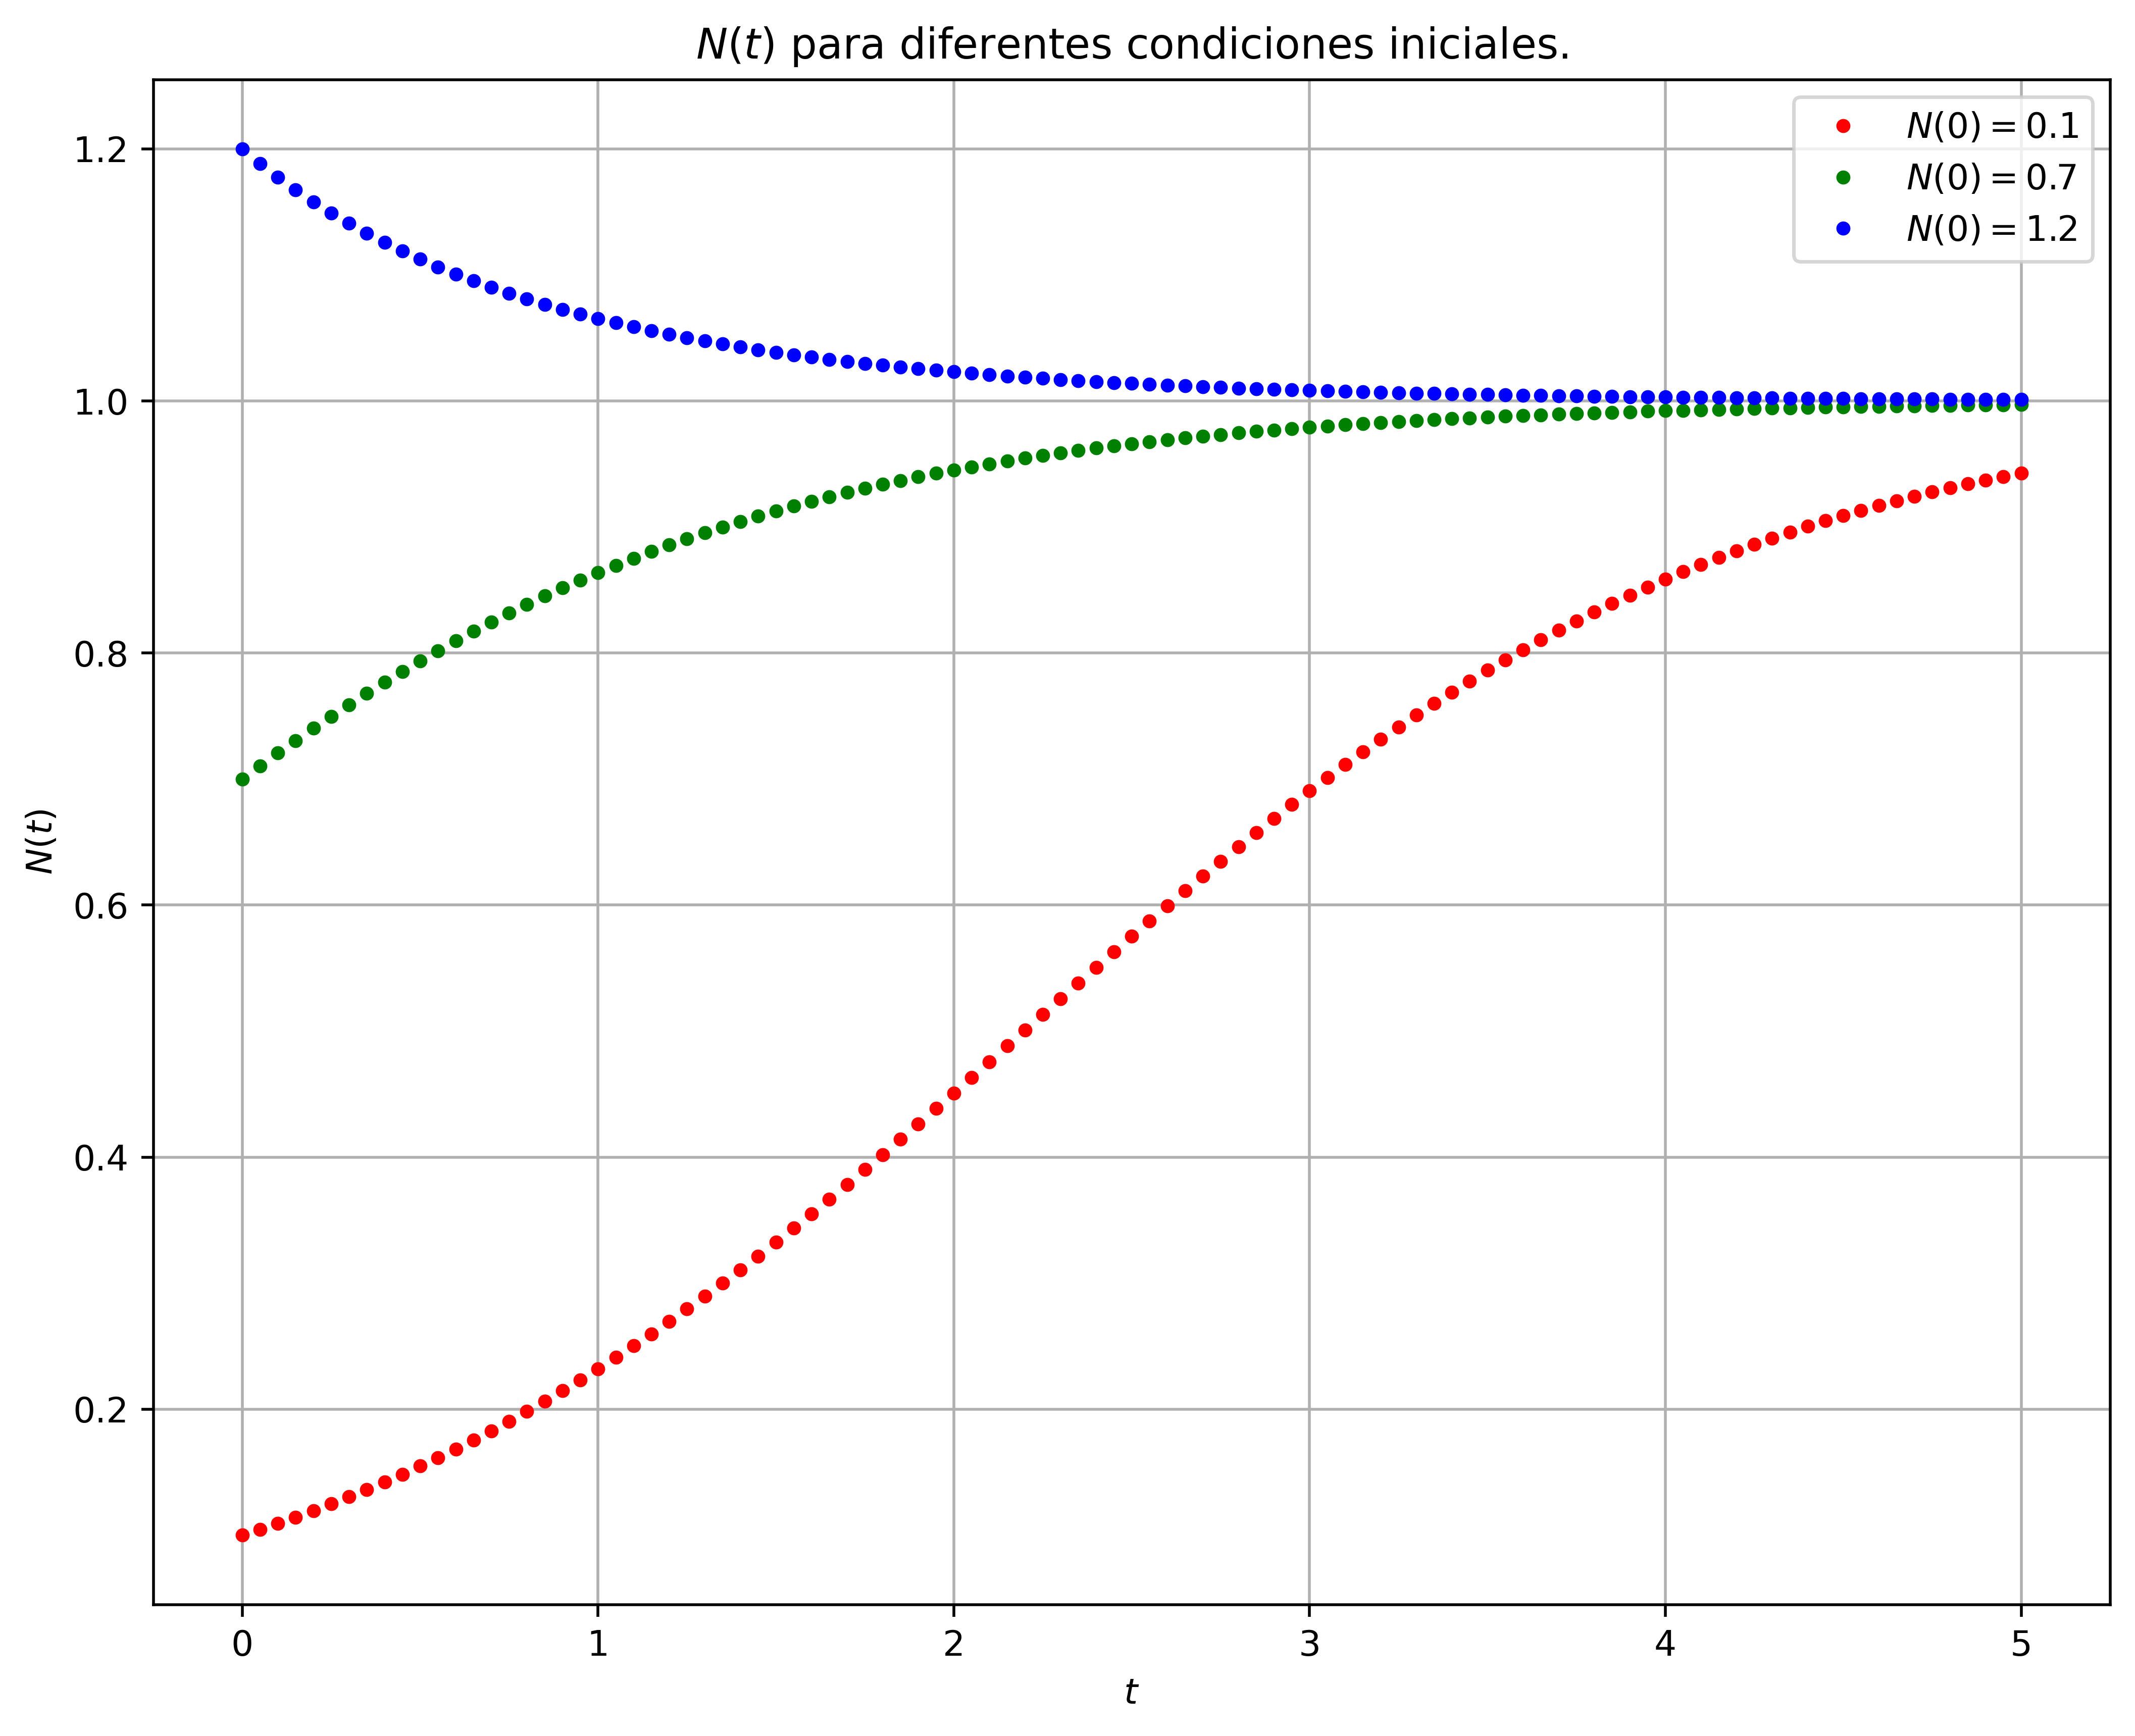

In [12]:
Na, t = runge_kuta_4(function2, np.array([1, 1]), 0.1, 0, 5, 100)
Nb, t = runge_kuta_4(function2, np.array([1, 1]), 0.7, 0, 5, 100)
Nc, t = runge_kuta_4(function2, np.array([1, 1]), 1.2, 0, 5, 100)

plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['figure.dpi'] = 500

plt.plot(t, Na, 'ro', markersize=3, label=r'$N(0) = 0.1$')
plt.plot(t, Nb, 'go', markersize=3, label=r'$N(0) = 0.7$')
plt.plot(t, Nc, 'bo', markersize=3, label=r'$N(0) = 1.2$')

plt.xlabel(r'$t$')
plt.ylabel(r'$N(t)$')
plt.title(r'$N(t)$' + ' para diferentes condiciones iniciales.')
plt.legend(loc='best')

plt.grid(True)
plt.show()